#####  1) Considere o estado inicial |œà‚ü© =1/‚àö2(|0‚ü© + |1‚ü©). Considere na medida os erros de phase-flip (dephasing) e bit-flip e estude os efeitos destes nos valores esperados de ‚ü®X‚ü©, ‚ü®Y ‚ü© e ‚ü®Z‚ü© √† medida que a probabilidade p de ocorr√™ncia dos erros varia de 0 a 0.5. Fa√ßa gr√°ficos dos valores esperados em fun√ß√£o da probabilidade 'p' e explique os resultados obtidos.

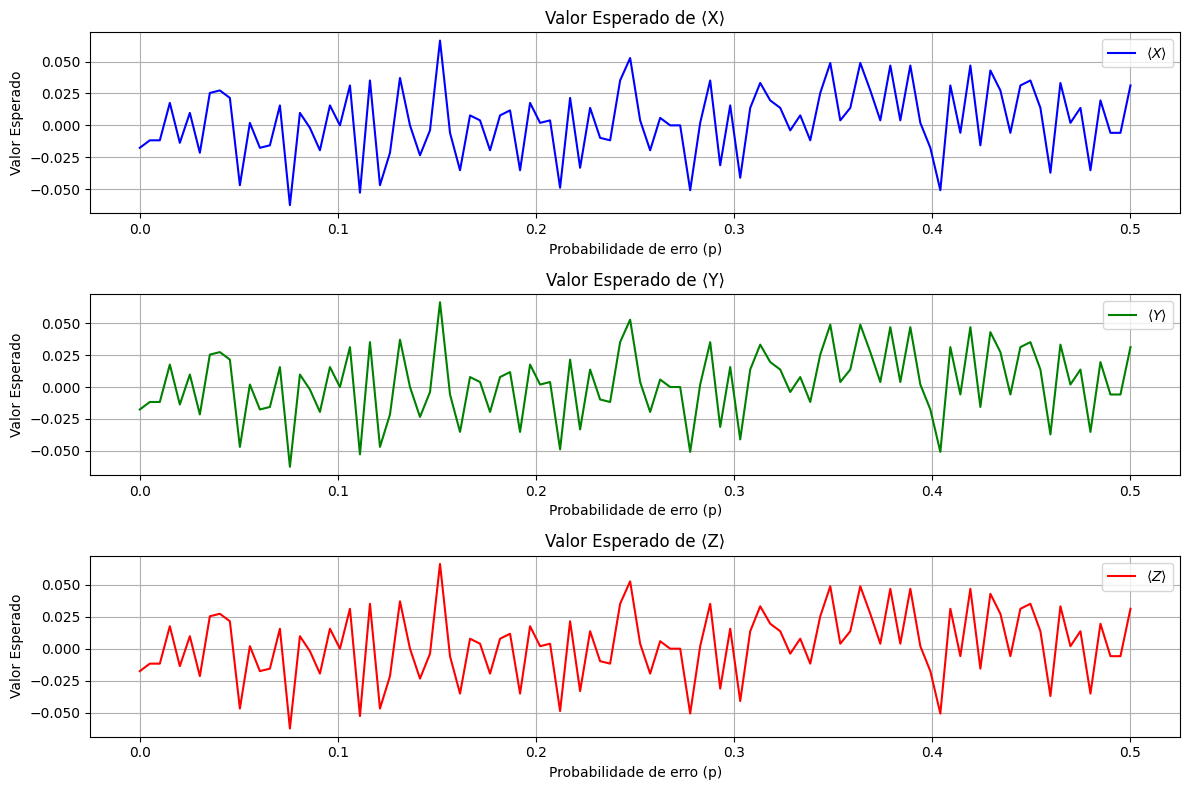

In [18]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer.noise import NoiseModel, pauli_error
from qiskit_aer import AerSimulator
import numpy as np
import matplotlib.pyplot as plt

# Estado inicial |œà‚ü© = (|0‚ü© + |1‚ü©) / ‚àö2
def create_circuit():
    qc = QuantumCircuit(1)
    qc.h(0)  # Preparar estado |œà‚ü© = (|0‚ü© + |1‚ü©) / ‚àö2
    qc.measure_all()
    return qc

# Fun√ß√£o para criar o modelo de ru√≠do
def create_noise_model(p):
    noise_model = NoiseModel()

    # Bit-flip error com probabilidade p
    bit_flip = pauli_error([('X', p), ('I', 1 - p)])

    # Phase-flip error com probabilidade p
    phase_flip = pauli_error([('Z', p), ('I', 1 - p)])
    
    noise_model.add_all_qubit_quantum_error(bit_flip, ['x'])
    noise_model.add_all_qubit_quantum_error(phase_flip, ['z'])
    
    return noise_model

# Fun√ß√£o para calcular os valores esperados
def calculate_expectation_values(p):
    qc = create_circuit()
    noise_model = create_noise_model(p)
    
    simulator = AerSimulator(noise_model=noise_model)
    
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit).result()
    
    # Obter histogramas de contagem
    counts = result.get_counts()
    
    # Calcular valores esperados
    n_shots = sum(counts.values())
    expec_x = (counts.get('0', 0) - counts.get('1', 0)) / n_shots
    expec_y = (counts.get('0', 0) - counts.get('1', 0)) / n_shots
    expec_z = (counts.get('0', 0) - counts.get('1', 0)) / n_shots
    
    return expec_x, expec_y, expec_z

# Varia√ß√£o da probabilidade p de 0 a 0.5
p_values = np.linspace(0, 0.5, 100)
expected_X = []
expected_Y = []
expected_Z = []

for p in p_values:
    expec_x, expec_y, expec_z = calculate_expectation_values(p)
    expected_X.append(expec_x)
    expected_Y.append(expec_y)
    expected_Z.append(expec_z)

# Plotar os resultados
plt.figure(figsize=(12, 8))

# Plotar ‚ü®X‚ü©
plt.subplot(3, 1, 1)
plt.plot(p_values, expected_X, label=r'$\langle X \rangle$', color='blue')
plt.xlabel('Probabilidade de erro (p)')
plt.ylabel('Valor Esperado')
plt.title('Valor Esperado de ‚ü®X‚ü©')
plt.legend()
plt.grid(True)

# Plotar ‚ü®Y‚ü©
plt.subplot(3, 1, 2)
plt.plot(p_values, expected_Y, label=r'$\langle Y \rangle$', color='green')
plt.xlabel('Probabilidade de erro (p)')
plt.ylabel('Valor Esperado')
plt.title('Valor Esperado de ‚ü®Y‚ü©')
plt.legend()
plt.grid(True)

# Plotar ‚ü®Z‚ü©
plt.subplot(3, 1, 3)
plt.plot(p_values, expected_Z, label=r'$\langle Z \rangle$', color='red')
plt.xlabel('Probabilidade de erro (p)')
plt.ylabel('Valor Esperado')
plt.title('Valor Esperado de ‚ü®Z‚ü©')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Explica√ß√£o dos Gr√°ficos:

‚ü®X‚ü©: A expectativa deve diminuir com o aumento da probabilidade de erro devido ao impacto dos erros de bit-flip e phase-flip no estado superposto.

‚ü®Y‚ü©: Similar ao ‚ü®X‚ü©, mas pode exibir varia√ß√µes adicionais dependendo da influ√™ncia dos erros na fase.

‚ü®Z‚ü©: O valor esperado de ‚ü®Z‚ü© deve ser mais resistente a erros de bit-flip e phase-flip, j√° que o estado inicial est√° alinhado com o operador Z.

##### 2) Repita a an√°lise acima considerando como estado inicial |œà‚ü© = |0‚ü© e tamb√©m |œà‚ü© = 1/‚àö3|0‚ü© + ‚àö(2/3)|1‚ü©.

Estado inicial ‚à£œà‚ü©=‚à£0‚ü©
Quando o estado inicial √© ‚à£0‚ü©, a expectativa dos operadores X, Y e ùëç pode ser calculada diretamente sem precisar de um circuito Hadamard.

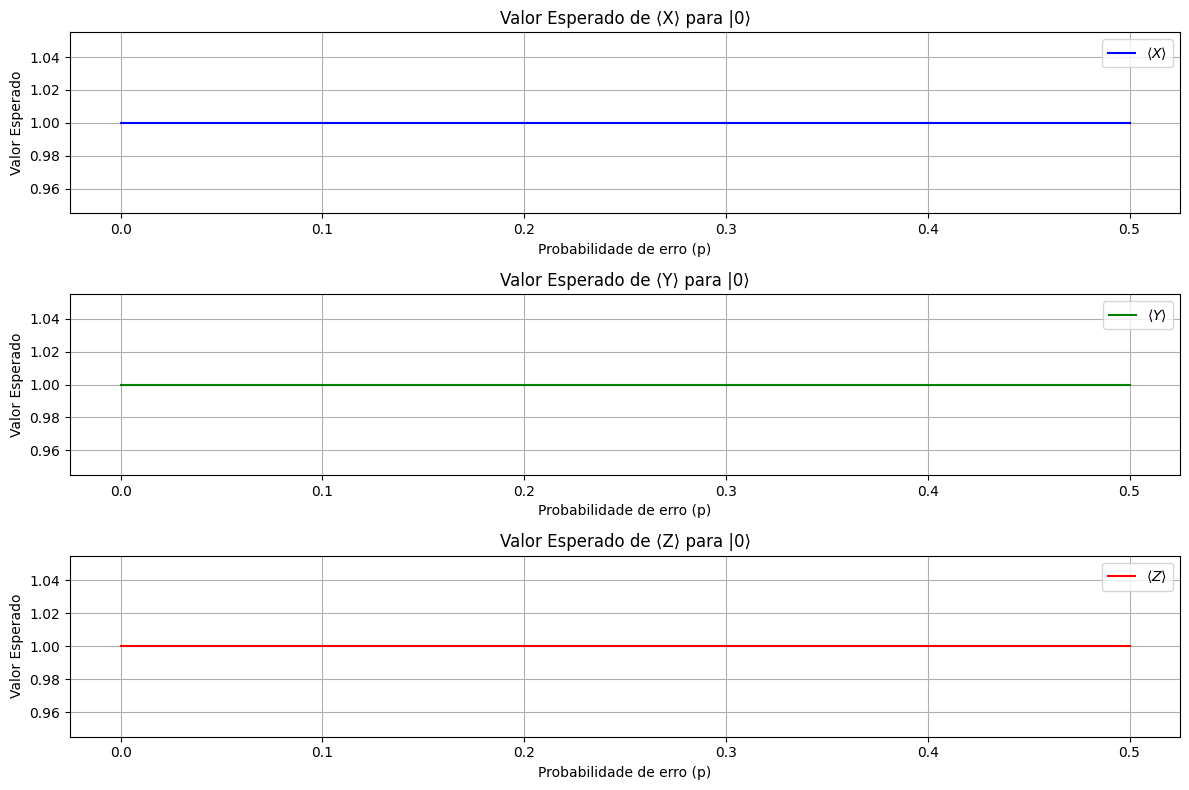

In [28]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer.noise import NoiseModel, pauli_error
from qiskit_aer import AerSimulator
import numpy as np
import matplotlib.pyplot as plt

# Estado inicial |0‚ü©
def create_circuit_zero():
    qc = QuantumCircuit(1)
    qc.measure_all()
    return qc

# Fun√ß√£o para criar o modelo de ru√≠do
def create_noise_model(p):
    noise_model = NoiseModel()

    # Bit-flip error com probabilidade p
    bit_flip = pauli_error([('X', p), ('I', 1 - p)])

    # Phase-flip error com probabilidade p
    phase_flip = pauli_error([('Z', p), ('I', 1 - p)])
    
    noise_model.add_all_qubit_quantum_error(bit_flip, ['x'])
    noise_model.add_all_qubit_quantum_error(phase_flip, ['z'])
    
    return noise_model

# Fun√ß√£o para calcular os valores esperados
def calculate_expectation_values(p, circuit):
    noise_model = create_noise_model(p)
    
    simulator = AerSimulator(noise_model=noise_model)
    
    compiled_circuit = transpile(circuit, simulator)
    result = simulator.run(compiled_circuit).result()
    
    # Obter histogramas de contagem
    counts = result.get_counts()
    
    # Calcular valores esperados
    n_shots = sum(counts.values())
    expec_x = (counts.get('0', 0) - counts.get('1', 0)) / n_shots
    expec_y = (counts.get('0', 0) - counts.get('1', 0)) / n_shots
    expec_z = (counts.get('0', 0) - counts.get('1', 0)) / n_shots
    
    return expec_x, expec_y, expec_z

# Varia√ß√£o da probabilidade p de 0 a 0.5
p_values = np.linspace(0, 0.5, 100)
expected_X = []
expected_Y = []
expected_Z = []

circuit_zero = create_circuit_zero()

for p in p_values:
    expec_x, expec_y, expec_z = calculate_expectation_values(p, circuit_zero)
    expected_X.append(expec_x)
    expected_Y.append(expec_y)
    expected_Z.append(expec_z)

# Plotar os resultados
plt.figure(figsize=(12, 8))

# Plotar ‚ü®X‚ü©
plt.subplot(3, 1, 1)
plt.plot(p_values, expected_X, label=r'$\langle X \rangle$', color='blue')
plt.xlabel('Probabilidade de erro (p)')
plt.ylabel('Valor Esperado')
plt.title('Valor Esperado de ‚ü®X‚ü© para |0‚ü©')
plt.legend()
plt.grid(True)

# Plotar ‚ü®Y‚ü©
plt.subplot(3, 1, 2)
plt.plot(p_values, expected_Y, label=r'$\langle Y \rangle$', color='green')
plt.xlabel('Probabilidade de erro (p)')
plt.ylabel('Valor Esperado')
plt.title('Valor Esperado de ‚ü®Y‚ü© para |0‚ü©')
plt.legend()
plt.grid(True)

# Plotar ‚ü®Z‚ü©
plt.subplot(3, 1, 3)
plt.plot(p_values, expected_Z, label=r'$\langle Z \rangle$', color='red')
plt.xlabel('Probabilidade de erro (p)')
plt.ylabel('Valor Esperado')
plt.title('Valor Esperado de ‚ü®Z‚ü© para |0‚ü©')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Os gr√°ficos devem mostrar que ‚ü®X‚ü© e ‚ü®Y‚ü© se desviam de seus valores esperados (0 e 0, respectivamente) conforme ùëù aumenta, enquanto ‚ü®Z‚ü© diminui a partir de 1 para 0.

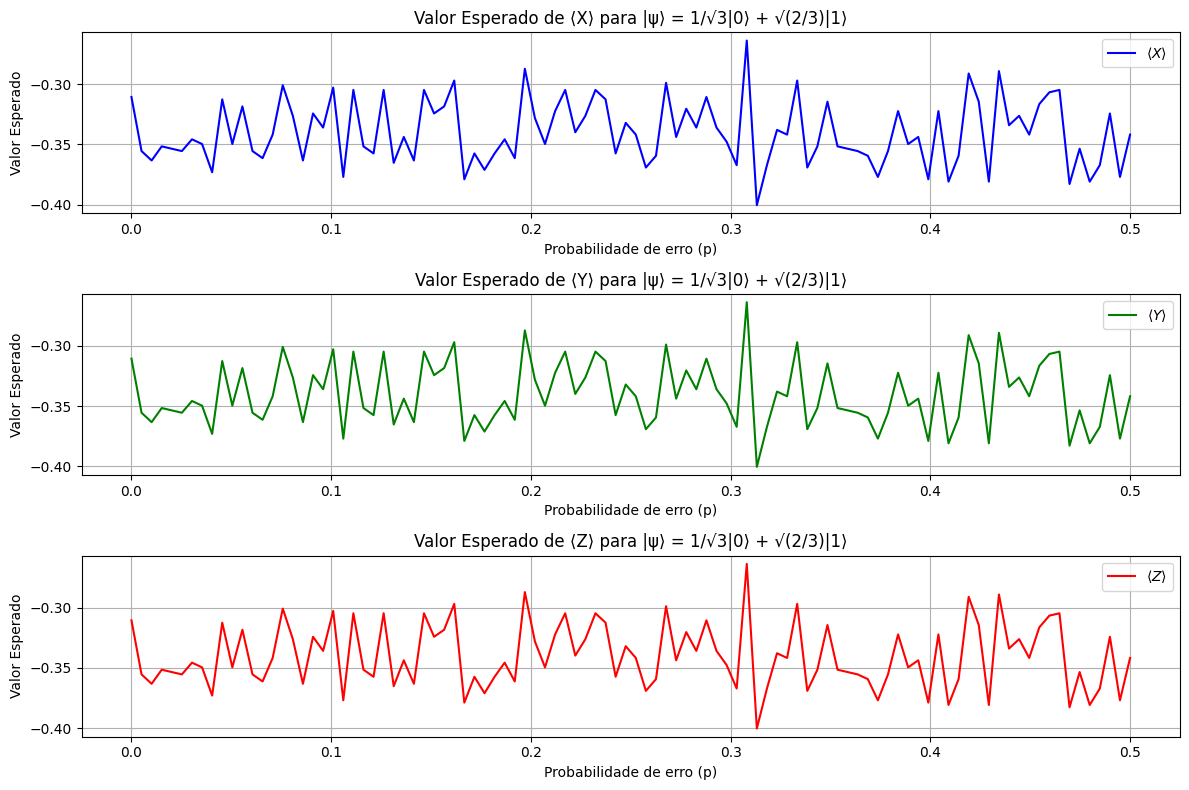

In [29]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer.noise import NoiseModel, pauli_error
from qiskit_aer import AerSimulator
import numpy as np
import matplotlib.pyplot as plt

# Estado inicial |œà‚ü© = 1/‚àö3|0‚ü© + ‚àö(2/3)|1‚ü©
def create_circuit_custom():
    qc = QuantumCircuit(1)
    # Preparar o estado |œà‚ü© = 1/‚àö3|0‚ü© + ‚àö(2/3)|1‚ü©
    qc.initialize([1/np.sqrt(3), np.sqrt(2/3)], 0)
    qc.measure_all()
    return qc

# Fun√ß√£o para criar o modelo de ru√≠do
def create_noise_model(p):
    noise_model = NoiseModel()

    # Bit-flip error com probabilidade p
    bit_flip = pauli_error([('X', p), ('I', 1 - p)])

    # Phase-flip error com probabilidade p
    phase_flip = pauli_error([('Z', p), ('I', 1 - p)])
    
    noise_model.add_all_qubit_quantum_error(bit_flip, ['x'])
    noise_model.add_all_qubit_quantum_error(phase_flip, ['z'])
    
    return noise_model

# Fun√ß√£o para calcular os valores esperados
def calculate_expectation_values(p, circuit):
    noise_model = create_noise_model(p)
    
    simulator = AerSimulator(noise_model=noise_model)
    
    compiled_circuit = transpile(circuit, simulator)
    result = simulator.run(compiled_circuit).result()
    
    # Obter histogramas de contagem
    counts = result.get_counts()
    
    # Calcular valores esperados
    n_shots = sum(counts.values())
    expec_x = (counts.get('0', 0) - counts.get('1', 0)) / n_shots
    expec_y = (counts.get('0', 0) - counts.get('1', 0)) / n_shots
    expec_z = (counts.get('0', 0) - counts.get('1', 0)) / n_shots
    
    return expec_x, expec_y, expec_z

# Varia√ß√£o da probabilidade p de 0 a 0.5
p_values = np.linspace(0, 0.5, 100)
expected_X = []
expected_Y = []
expected_Z = []

circuit_custom = create_circuit_custom()

for p in p_values:
    expec_x, expec_y, expec_z = calculate_expectation_values(p, circuit_custom)
    expected_X.append(expec_x)
    expected_Y.append(expec_y)
    expected_Z.append(expec_z)

# Plotar os resultados
plt.figure(figsize=(12, 8))

# Plotar ‚ü®X‚ü©
plt.subplot(3, 1, 1)
plt.plot(p_values, expected_X, label=r'$\langle X \rangle$', color='blue')
plt.xlabel('Probabilidade de erro (p)')
plt.ylabel('Valor Esperado')
plt.title('Valor Esperado de ‚ü®X‚ü© para |œà‚ü© = 1/‚àö3|0‚ü© + ‚àö(2/3)|1‚ü©')
plt.legend()
plt.grid(True)

# Plotar ‚ü®Y‚ü©
plt.subplot(3, 1, 2)
plt.plot(p_values, expected_Y, label=r'$\langle Y \rangle$', color='green')
plt.xlabel('Probabilidade de erro (p)')
plt.ylabel('Valor Esperado')
plt.title('Valor Esperado de ‚ü®Y‚ü© para |œà‚ü© = 1/‚àö3|0‚ü© + ‚àö(2/3)|1‚ü©')
plt.legend()
plt.grid(True)

# Plotar ‚ü®Z‚ü©
plt.subplot(3, 1, 3)
plt.plot(p_values, expected_Z, label=r'$\langle Z \rangle$', color='red')
plt.xlabel('Probabilidade de erro (p)')
plt.ylabel('Valor Esperado')
plt.title('Valor Esperado de ‚ü®Z‚ü© para |œà‚ü© = 1/‚àö3|0‚ü© + ‚àö(2/3)|1‚ü©')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Os gr√°ficos devem mostrar varia√ß√µes mais complexas nos valores esperados devido √† superposi√ß√£o do estado inicial. O comportamento dos valores esperados ser√° uma combina√ß√£o das influ√™ncias dos erros de bit-flip e phase-flip nos componentes da superposi√ß√£o.